In [1]:
import sys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
from ast import literal_eval
import math
from laplotter_compare import ComparePlotter


warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv('../CSV_files/KITTI/kitti_LSTM_RESULTS.csv')

In [3]:
x_target = [literal_eval(i) for i in df['x_target']]
y_target = [literal_eval(i) for i in df['y_target']]
XYZ_x = [literal_eval(i) for i in df['XYZ_x']]
XYZ_y = [literal_eval(i) for i in df['XYZ_y']]
XY_x = [literal_eval(i) for i in df['XY_x']]
XY_y = [literal_eval(i) for i in df['XY_y']]
XY_sequence_x = [literal_eval(i) for i in df['XY_sequence_x']]
XY_sequence_y = [literal_eval(i) for i in df['XY_sequence_y']]

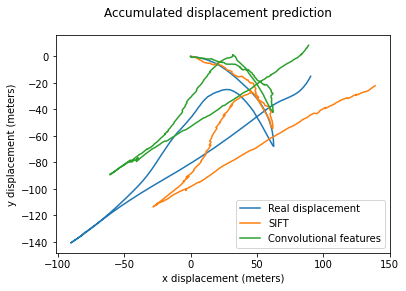

In [4]:
x_coordi, y_coordi = [0], [0]
x_coordi_SIFT, y_coordi_SIFT = [0], [0]
x_coordi_CF, y_coordi_CF = [0], [0]

ctr = 0
for i, j in zip(x_target[0], y_target[0]):
    x_coordi.append(i +  x_coordi[ctr])
    y_coordi.append(j +  y_coordi[ctr])
    ctr +=1
ctr = 0

for i, j in zip(XY_sequence_x[0], XY_sequence_y[0]):
    x_coordi_SIFT.append(i +  x_coordi_SIFT[ctr])
    y_coordi_SIFT.append(j +  y_coordi_SIFT[ctr])
    ctr +=1
ctr = 0

for i, j in zip(XY_sequence_x[1], XY_sequence_y[1]):
    x_coordi_CF.append(i +  x_coordi_CF[ctr])
    y_coordi_CF.append(j +  y_coordi_CF[ctr])
    ctr +=1

plt.plot(x_coordi, y_coordi, label = "Real displacement")
plt.plot(x_coordi_SIFT, y_coordi_SIFT, label = "SIFT")
plt.plot(x_coordi_CF, y_coordi_CF, label = "Convolutional features")
plt.suptitle('Accumulated displacement prediction')
plt.xlabel('x displacement (meters)')
plt.ylabel('y displacement (meters)')
plt.legend()
plt.show()

In [5]:
print(len(XY_sequence_x[0]))

428


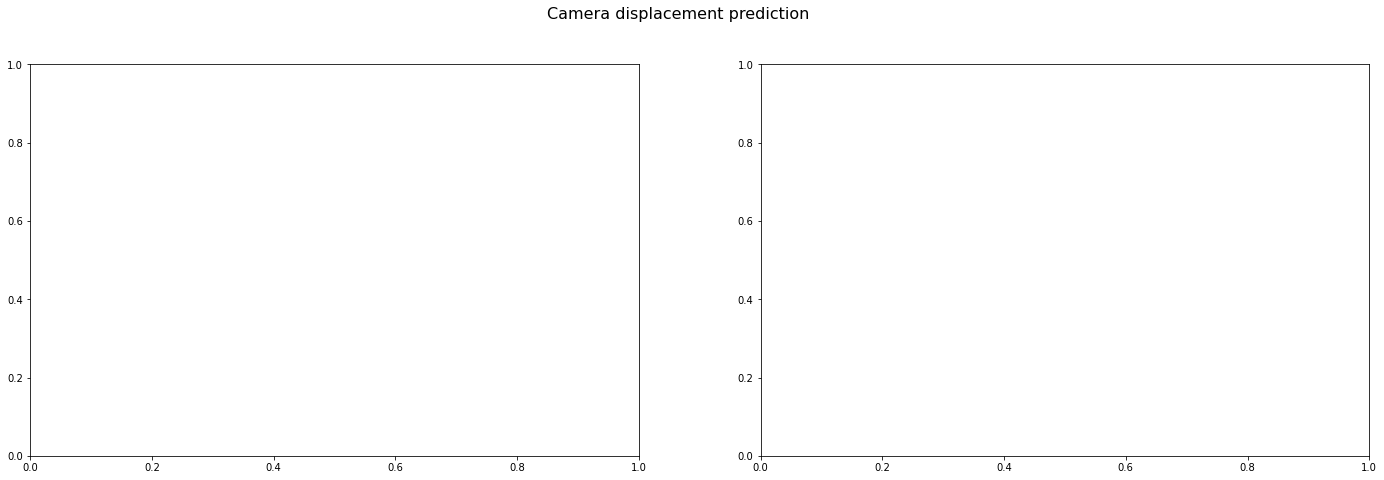

<Figure size 432x288 with 0 Axes>

In [6]:
pred_plotter = ComparePlotter(title="Camera displacement prediction", save_to_filepath="PLOTS/KITTI/comparisons/XYZ_comparison.png")


# add them all
for frame in range(len(x_target[0])-4):
    # deactivate redrawing after each update
    pred_plotter.add_values(frame, loss_train=x_target[0][frame], loss_val1=XYZ_x[0][frame], loss_val2=XYZ_x[1][frame], acc_train=y_target[0][frame], acc_val1=XYZ_y[0][frame],  acc_val2=XYZ_y[1][frame],redraw=False)

# redraw once at the end
pred_plotter.redraw()